In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from scipy import stats

# Data Preprocessing

In [4]:
# read dataset
df = pd.read_csv('/content/drive/MyDrive/Maingames_DS_dataset.csv')

In [5]:
df.head()

,Unnamed: 0,Country,Gender,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,Character_Facet_Cont_Dutifulness,Character_Cont_Conscientiousness,Character_Facet_Cont_Sympathy,Personal_Values_Facet_Cont_UniversalismTolerance,Temperament_Choleric,Self_Esteem_Cont_SEDiscrepancyResponsibility,Character_Facet_Cont_ArtisticInterests,Temperament_Sanguine,Character_Facet_Cont_Friendliness,Temperament_Diligent,Self_Esteem_Cont_SELevel,Character_Cont_Extraversion,Role_Director,Character_Facet_Cont_SelfConsciousness,Temperament_Energetic,Character_Facet_Cont_Adventurousness,Role_Craftsman,Self_Esteem_Cont_SELevelResponsibility,Self_Esteem_Cont_SEAspirationResponsibility,Role_Toastmaster,Personal_Values_Facet_Cont_PowerDominance,Role_Marshal,Self_Esteem_Cont_SELevelAchievements,Self_Esteem_Cont_SEDiscrepancySociability,Personal_Values_Cont_SelfEnhancement,Self_Esteem_Cont_SEAspiration,Role_Supplier,Character_Facet_Cont_Activity,Temperament_Stable,Personal_Values_Facet_Cont_PowerResources,...,Personal_Values_Facet_Cont_SecurityPersonal,Personal_Values_Facet_Cont_UniversalismConcern,Role_Advisor,Self_Esteem_Cont_SELevelOriginality,Role_Analyst,Personal_Values_Cont_SelfTranscendence,Personal_Values_Facet_Cont_Achievement,Character_Facet_Cont_Trust,Temperament_Unstable,Character_Cont_Agreeableness,Role_Inventor,Personal_Values_Facet_Cont_BenevolenceCaring,Personal_Values_Facet_Cont_BenevolenceDependability,Character_Facet_Cont_Vulnerability,Character_Facet_Cont_ExcitementSeeking,Role_Designer,Role_Deputy,Personal_Values_Cont_OpennessToChange,PaidStarPerWatchedHour.1,Character_Facet_Cont_Morality,Character_Facet_Cont_Depression,Role_Strategist,Role_Inspector,Self_Esteem_Cont_SEAspirationAppearance,Character_Facet_Cont_SelfDiscipline,Self_Esteem_Cont_SEDiscrepancyIntelligence,Role_Companion,Character_Facet_Cont_Cooperation,Role_Commander,Role_Activist,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
0,0,ID,Male,MLBB,96751,104,0.004113,0.663442,0.718679,0.288008,0.471456,0.522711,0.337836,0.554134,0.0,0.496688,0.504059,0.25,0.494384,0.125,0.462912,0.474577,0.679339,0.471482,0.125,0.544957,0.453882,0.679427,0.721495,0.530887,0.356304,0.620860,0.605858,0.473335,0.303076,0.881936,0.509514,0.691145,0.750,0.317289,...,0.353928,0.477637,0.577660,0.728769,0.627180,0.275763,0.322608,0.450080,0.500,0.467756,0.705475,0.543155,0.244511,0.686694,0.554406,0.533952,0.516859,0.303909,0.004113,0.553544,0.771031,0.783868,0.670467,0.648751,0.518061,0.473907,0.541372,0.352032,0.449807,0.514417,0.523116,0.408444,0.318747,0.684412,0.494384,0.751974,0.524306,0.299052,0.803920,0.625
1,1,ID,Male,8 Ball Pool,4781,174,0.002855,0.543255,0.427887,0.430609,0.493514,0.348513,0.408481,0.610872,0.0,0.557879,0.577758,0.50,0.468738,0.250,0.386516,0.445183,0.381432,0.352964,0.000,0.604113,0.325222,0.743407,0.534425,0.349459,0.341675,0.486200,0.490160,0.579283,0.298714,0.860851,0.098237,0.554197,0.625,0.317427,...,0.425649,0.456436,0.239550,0.771001,0.403616,0.264248,0.333644,0.504510,0.125,0.225692,0.718745,0.460678,0.276966,0.627786,0.511837,0.488030,0.263292,0.309062,0.002855,0.352700,0.462166,0.549318,0.397981,0.690168,0.442303,0.482889,0.230455,0.401419,0.277163,0.286003,0.444493,0.407624,0.382594,0.635493,0.468738,0.571198,0.100202,0.304527,0.751291,0.125
2,2,ID,Female,Free Fire - Battlegrounds,68246,83,0.003007,0.527279,0.399873,0.753009,0.472405,0.376854,0.518602,0.579433,0.5,0.395199,0.594752,0.00,0.413872,0.500,0.568077,0.322573,0.305979,0.750039,0.000,0.657773,0.784232,0.555626,0.568014,0.555618,0.362791,0.177483,0.189999,0.510046,0.231113,0.805830,0.360728,0.546109,0.000,0.216132,...,0.355100,0.698604,0

In [6]:
# get dataset feature info
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 127 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           631 non-null    int64  
 1   Country                                              631 non-null    object 
 2   Gender                                               630 non-null    object 
 3   Game                                                 629 non-null    object 
 4   Total Follower                                       630 non-null    object 
 5   Broadcast Hours                                      631 non-null    int64  
 6   PaidStarPerWatchedHour                               629 non-null    float64
 7   Character_Facet_Cont_Rigidity                        631 non-null    float64
 8   Character_Facet_Cont_AchievementStriving             631 non-null    

Columns : 127, Rows : 631

Supicious columns: Unnamed: 0, PaidStarPerWatchedHour.1

Supicious type columns: Total Follower

In [7]:
# delete unnamed: 0
df = df.drop(columns='Unnamed: 0')
df.shape

(631, 126)

In [8]:
# examine PaidStarPerWatchedHour.1 vs PaidStarPerWatchedHour
a = df['PaidStarPerWatchedHour']-df['PaidStarPerWatchedHour.1']
a.sum()

0.0

PaidStarPerWatchedHour.1 is a duplicated column

In [9]:
# delete PaidStarPerWatchedHour.1
df = df.drop(columns='PaidStarPerWatchedHour.1')
df.shape

(631, 125)

In [10]:
# examine Total Follower that isnt int type
def check_int(value):
    try:
        int(value)
        return np.NaN
    except ValueError:
        return value
df['Total Follower'].apply(check_int).dropna()

508         -
534         -
576    250,98
Name: Total Follower, dtype: object

There are two suspicious entry in Total Follower, - and 250,98

In [11]:
# remove suspicious value in Total Follower
df = df[(df['Total Follower'] != '-') & (df['Total Follower'] != '250,98')]
df['Total Follower'].apply(check_int).dropna()

Series([], Name: Total Follower, dtype: float64)

In [12]:
# check for NaN
print(df.isna().sum().to_string())

Country                                                0
Gender                                                 1
Game                                                   2
Total Follower                                         1
Broadcast Hours                                        0
PaidStarPerWatchedHour                                 2
Character_Facet_Cont_Rigidity                          0
Character_Facet_Cont_AchievementStriving               0
Personal_Values_Facet_Cont_Hedonism                    0
Character_Facet_Cont_Dutifulness                       0
Character_Cont_Conscientiousness                       0
Character_Facet_Cont_Sympathy                          0
Personal_Values_Facet_Cont_UniversalismTolerance       0
Temperament_Choleric                                   0
Self_Esteem_Cont_SEDiscrepancyResponsibility           0
Character_Facet_Cont_ArtisticInterests                 0
Temperament_Sanguine                                   0
Character_Facet_Cont_Friendline

In [13]:
# delete nan value
df = df.dropna()
df.shape

(623, 125)

In [14]:
# check duplicate value
df.duplicated(keep='last').sum()

0

In [15]:
# change total follower to int
df['Total Follower'] = df['Total Follower'].astype('int64')
df['Total Follower'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


dtype('int64')

In [16]:
# examine unique value in categorical column
columns_object = list(df.select_dtypes(['object']).columns)
for i in columns_object:
  print(i)
  print(df[i].unique())
  print(' ')

Country
['ID' 'PH' 'VN']
 
Gender
['Male' 'Female']
 
Game
['MLBB' '8 Ball Pool' 'Free Fire - Battlegrounds' 'PUBG'
 'Call of Duty: Mobile' 'Dead by Daylight' 'Persona 5 Royal'
 'Grand Theft Auto V' 'Euro Truck Simulator 2' 'Days Gone'
 "Assassin's Creed Odyssey" 'Worms Zone' 'Star Wars Jedi: Fallen Order'
 'Naruto Shippuden: Ultimate Ninja Storm 4' 'Apex Legends'
 'Moon of Madness' 'Sea of Thieves' 'EA Sports UFC 3' 'eFootball PES 2020'
 'MotoGP' 'Wormate.io' 'The Warriors' 'God of War' 'Point Blank Indonesia'
 'Valorant' 'Dota 2' 'No MLBB Video' 'Yakuza: Kiwami 2'
 'Counter-Strike: Global Offensive' 'Audition Online' 'Township Mobile'
 'League of Legends' 'Call of Duty: Warzone' 'Crossfire'
 "Five Nights at Freddy's 2" 'RULES OF SURVIVAL' 'NBA 2K20' 'Minecraft'
 'Ragnarok M: Eternal Love' 'Little Big Snake' 'World War Z'
 'CABAL ONLINE' 'Roblox' 'League of Legends: Wild Rift'
 'The Last of Us: Part II' 'Age of Empires' 'MU Online' 'FIFA Online 4'
 'Crazy Kart' 'Auto Chess' 'Identity 

There are two suspicious value in Game columns, Agge of Empires and -

In [17]:
# rename Agge of Empires and remove - in Game columns
df['Game'] = df['Game'].where(df['Game'] != 'Agge of Empires', 'Age of Empires')
df = df[df['Game'] != '-']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
df.shape

(621, 125)

In [19]:
df = df[df['Broadcast Hours'] != 0]

# Exploratory Data Analysis

## PaidStarPerWatchedHour Distribution

In [20]:
df.describe()[['PaidStarPerWatchedHour']]

,PaidStarPerWatchedHour
count,620.000000
mean,0.012179
std,0.104623
min,0.000000
25%,0.000921
50%,0.002598
75%,0.007013
max,2.561621


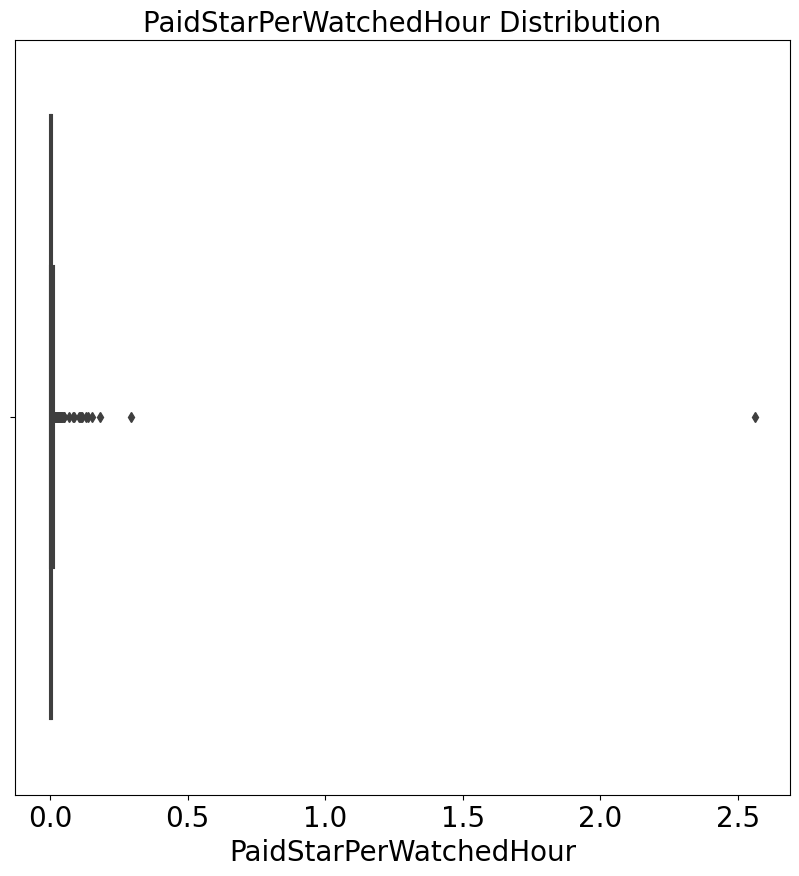

In [21]:
fig = plt.figure(figsize =(10, 10),dpi=100)
colors = sns.color_palette('pastel')[0]
ax = sns.boxplot(x='PaidStarPerWatchedHour', data=df)
ax.axes.set_title("PaidStarPerWatchedHour Distribution",fontsize=20)
ax.set_xlabel("PaidStarPerWatchedHour",fontsize=20)
ax.tick_params(labelsize=20)
plt.show()

From the result above i can say the distribution has heavy positive skew, and there are some outlier (my assumption : outlier is the data outside boxplot whisker range). 

I dont remove the outlier in this case because i want make the use of it and i assume this not an error input but there still a probability that will happen in a real world.

Next I will compare the streamer based on high paid star and low paid star to see their characteristics from the available feature.

## Country Comparison

In [22]:
df['category'] = np.where(df['PaidStarPerWatchedHour'] > df['PaidStarPerWatchedHour'].quantile(0.75),'high',np.where(df['PaidStarPerWatchedHour'] < df['PaidStarPerWatchedHour'].quantile(0.25),'low','normal'))

In [30]:
# dataframe with high pay rate
df1_high = df[df['PaidStarPerWatchedHour'] > df['PaidStarPerWatchedHour'].quantile(0.75)]
# dataframe with high pay rate
df1_low = df[df['PaidStarPerWatchedHour'] < df['PaidStarPerWatchedHour'].quantile(0.25)]
# dataframe exclude outlier
iqr = df['PaidStarPerWatchedHour'].quantile(0.75)-df['PaidStarPerWatchedHour'].quantile(0.25)
dfm = df[(df['PaidStarPerWatchedHour'] <= (df['PaidStarPerWatchedHour'].quantile(0.75)+(1.5*iqr))) & (df['PaidStarPerWatchedHour'] >= (df['PaidStarPerWatchedHour'].quantile(0.25)-(1.5*iqr)))]

I categorize high and low paid star streamer based on q3 and q1 because i hope i can see a different behavior between

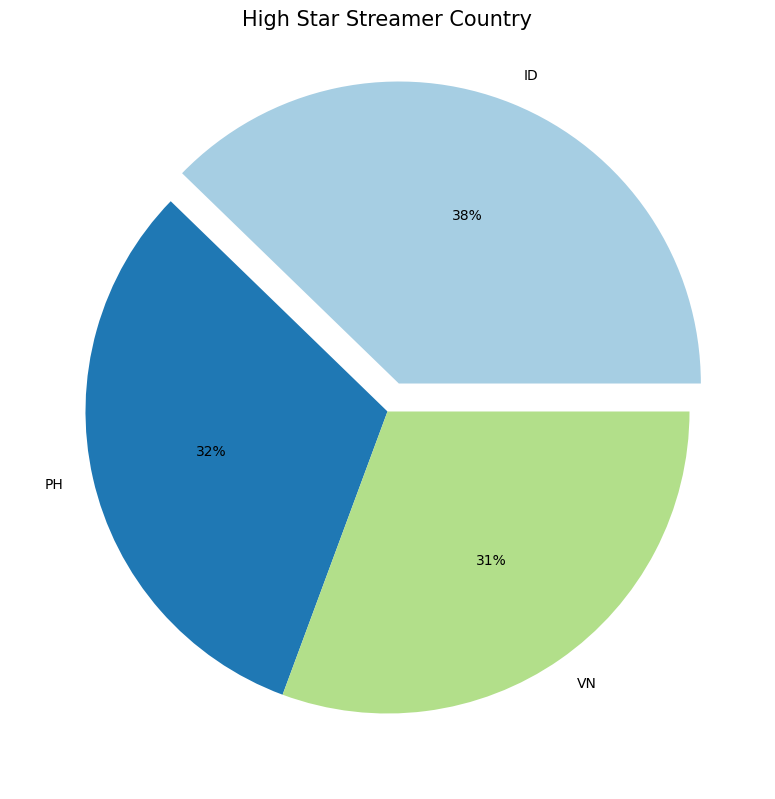

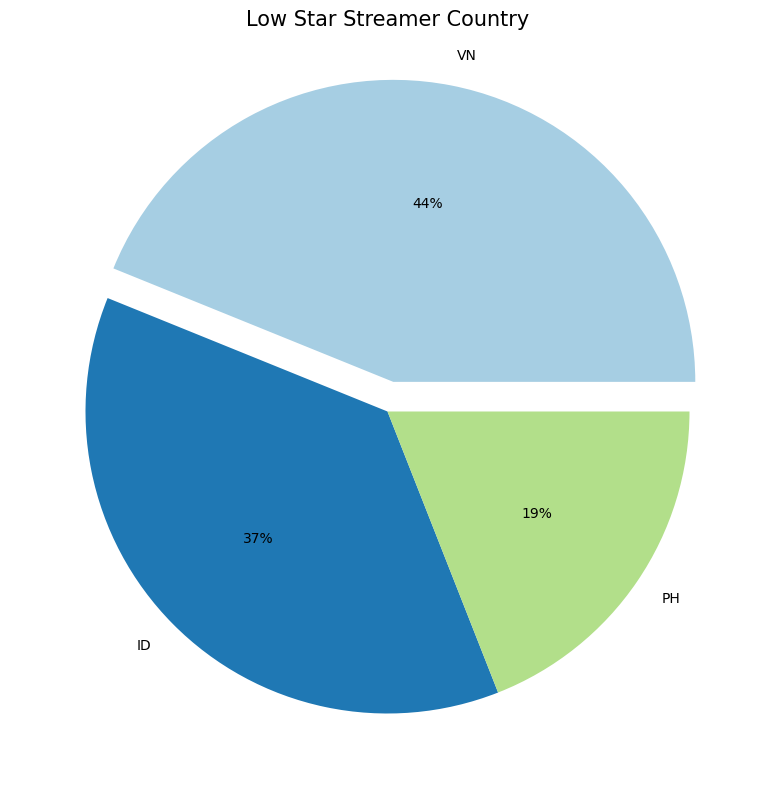

In [25]:
# country comparison graph
data = df1_high.groupby(['Country']).agg({'Gender':'count'}).reset_index()
fig = plt.figure(figsize =(10, 10),dpi=100)
data = data.sort_values(by='Gender',ascending=False).reset_index()
colors = sns.color_palette('Paired')[0:15]
#create pie chart
plt.pie(data['Gender'], labels = data['Country'] , colors = colors, autopct='%.0f%%', explode=[0.1,0,0])
plt.title("High Star Streamer Country",fontsize=15)
plt.show()

data = df1_low.groupby(['Country']).agg({'Gender':'count'}).reset_index()
fig = plt.figure(figsize =(10, 10),dpi=100)
data = data.sort_values(by='Gender',ascending=False).reset_index()
colors = sns.color_palette('Paired')[0:15]
#create pie chart
plt.pie(data['Gender'], labels = data['Country'] , colors = colors, autopct='%.0f%%', explode=[0.1,0,0])
plt.title("Low Star Streamer Country",fontsize=15)
plt.show()

From the graph 43% high star player are from philiphine then followed by indonesia and vietnam, contrast with low player star that 44% from vietnam then followed by indonesia and philipine

### Country PH x VN H0 Testing

From my statement above i try to make hypothesis testing to prove that country have a effect in streamer pay rate and because i used assumption on high and low star criteria. I used sample from the dataframe with no outlier

The hypothesis are

H0 : Streamer from PH have median pay rate equal to steamer from VN

H1 : Streamer from PH have median pay rate not equal to steamer from VN

This test will try to reject the H0 hypothesis 

In [33]:
stat_avg = 0
p_avg = 0
alpha = 0.03
for i in range(1,10001):
  df_yes = dfm['PaidStarPerWatchedHour'][dfm['Country'] == 'PH']
  df_no = dfm['PaidStarPerWatchedHour'][dfm['Country'] == 'VN']
  if df_yes.shape[0] < df_no.shape[0]:
    df_no = dfm['PaidStarPerWatchedHour'][dfm['Country'] == 'VN'].sample(n=df_yes.shape[0])
  else:
    df_yes = dfm['PaidStarPerWatchedHour'][dfm['Country'] == 'PH'].sample(n=df_no.shape[0])
  stat, p = stats.mannwhitneyu(df_yes, df_no)
  stat_avg = (stat_avg+stat)/2
  p_avg = (p_avg+p)/2
print(' ')
print('MWU test result p-val = %.8f' % (p_avg))
print(' ')
if p_avg > alpha:
  print('Fail to reject H0')
else:
  print('Reject H0')

 
MWU test result p-val = 0.00026280
 
Reject H0


Because the p value is smaller than alpha = 0.03, H0 is rejected and i can say at 3% significance level, streamer from PH have average pay rate not equal to streamer from VN and country have an effect on pay rate.

## Total Follower Comparison

In [ ]:
df1_high.describe()[['Total Follower']]

,Total Follower
count,1.550000e+02
mean,2.335709e+05
std,6.594076e+05
min,5.478000e+03
25%,2.471200e+04
50%,7.769100e+04
75%,1.776360e+05
max,7.075717e+06


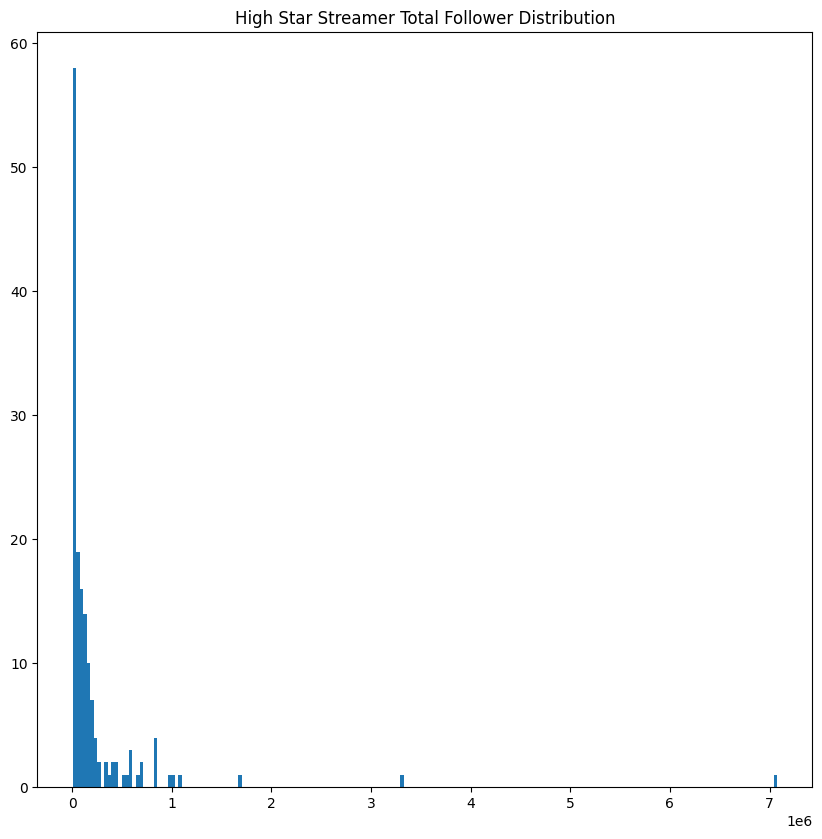

In [ ]:
n_bins = 200
plt.figure(figsize=(10, 10), dpi=100)
plt.hist(df1_high['Total Follower'], bins=n_bins)
plt.title('High Star Streamer Total Follower Distribution')
plt.show()

In [ ]:
df1_low.describe()[['Total Follower']]

,Total Follower
count,1.550000e+02
mean,1.424371e+05
std,2.111197e+05
min,2.638000e+03
25%,2.539050e+04
50%,7.634900e+04
75%,1.473330e+05
max,1.205069e+06


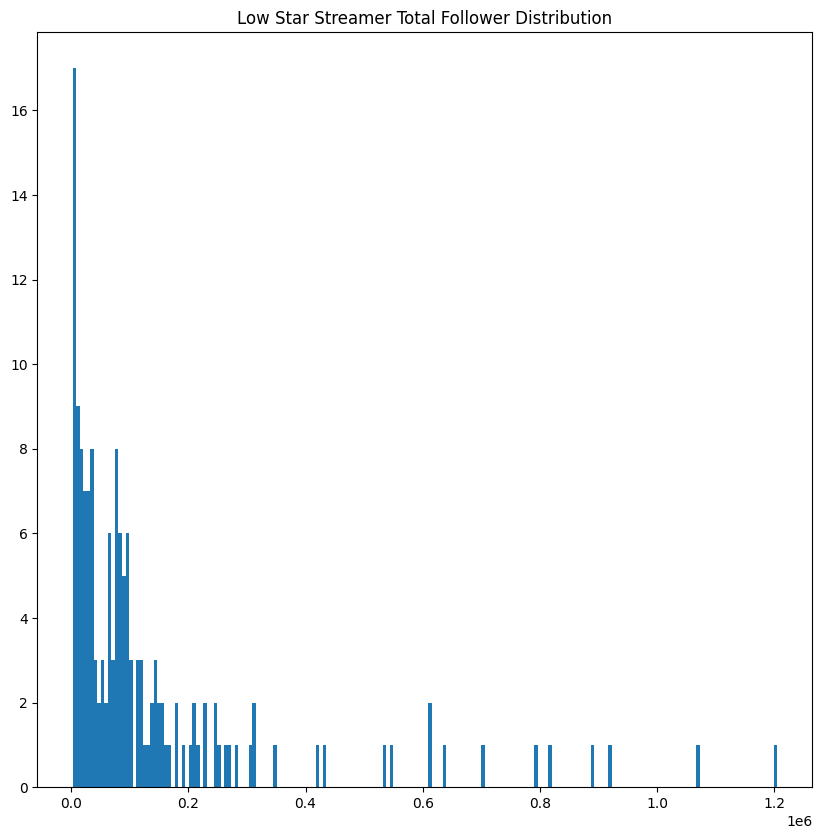

In [ ]:
n_bins = 200
plt.figure(figsize=(10, 10), dpi=100)
plt.hist(df1_low['Total Follower'], bins=n_bins)
plt.title('Low Star Streamer Total Follower Distribution')
plt.show()

From graph and statistic summary above, i see there is postive skew distribution from both and the high star streamer is more skewed than low star streamer but there isnt big difference in median, q1, q3 position.

So i assume there is no big effect of the total follower here and to prove my assumption here comes the hypothesis:

H0 : Streamers with total follower >= 7.5e4 have median pay rate equal to steamer with total follower <= 7.5e4

H1 : Streamers with total follower >= 7.5e4 have median pay rate not equal to steamer with total follower <= 7.5e4

In [35]:
df['Total Follower'].describe()

count    6.200000e+02
mean     2.217472e+05
std      5.570879e+05
min      2.638000e+03
25%      2.598000e+04
50%      7.583100e+04
75%      1.708652e+05
max      7.075717e+06
Name: Total Follower, dtype: float64

In [40]:
stat_avg = 0
p_avg = 0
alpha = 0.03
m = df['Total Follower'].quantile(0.5)
for i in range(1,10001):
  df_yes = dfm['PaidStarPerWatchedHour'][dfm['Total Follower'] >= m]
  df_no = dfm['PaidStarPerWatchedHour'][dfm['Total Follower'] < m]
  if df_yes.shape[0] < df_no.shape[0]:
    df_no = dfm['PaidStarPerWatchedHour'][dfm['Total Follower'] < m].sample(n=df_yes.shape[0])
  else:
    df_yes = dfm['PaidStarPerWatchedHour'][dfm['Total Follower'] >= m].sample(n=df_no.shape[0])
  stat, p = stats.mannwhitneyu(df_yes, df_no)
  stat_avg = (stat_avg+stat)/2
  p_avg = (p_avg+p)/2
print(' ')
print('MWU test result p-val = %.8f' % (p_avg))
print(' ')
if p_avg > alpha:
  print('Fail to reject H0')
else:
  print('Reject H0')

 
MWU test result p-val = 0.20872309
 
Fail to reject H0


## HoursPlayed Comparison

In [ ]:
df1_high.describe()[['Broadcast Hours']]

,Broadcast Hours
count,155.000000
mean,131.690323
std,49.135457
min,45.000000
25%,93.500000
50%,117.000000
75%,162.500000
max,349.000000


In [ ]:
df1_low.describe()[['Broadcast Hours']]

,Broadcast Hours
count,155.000000
mean,120.606452
std,45.125006
min,4.000000
25%,91.500000
50%,109.000000
75%,136.500000
max,349.000000


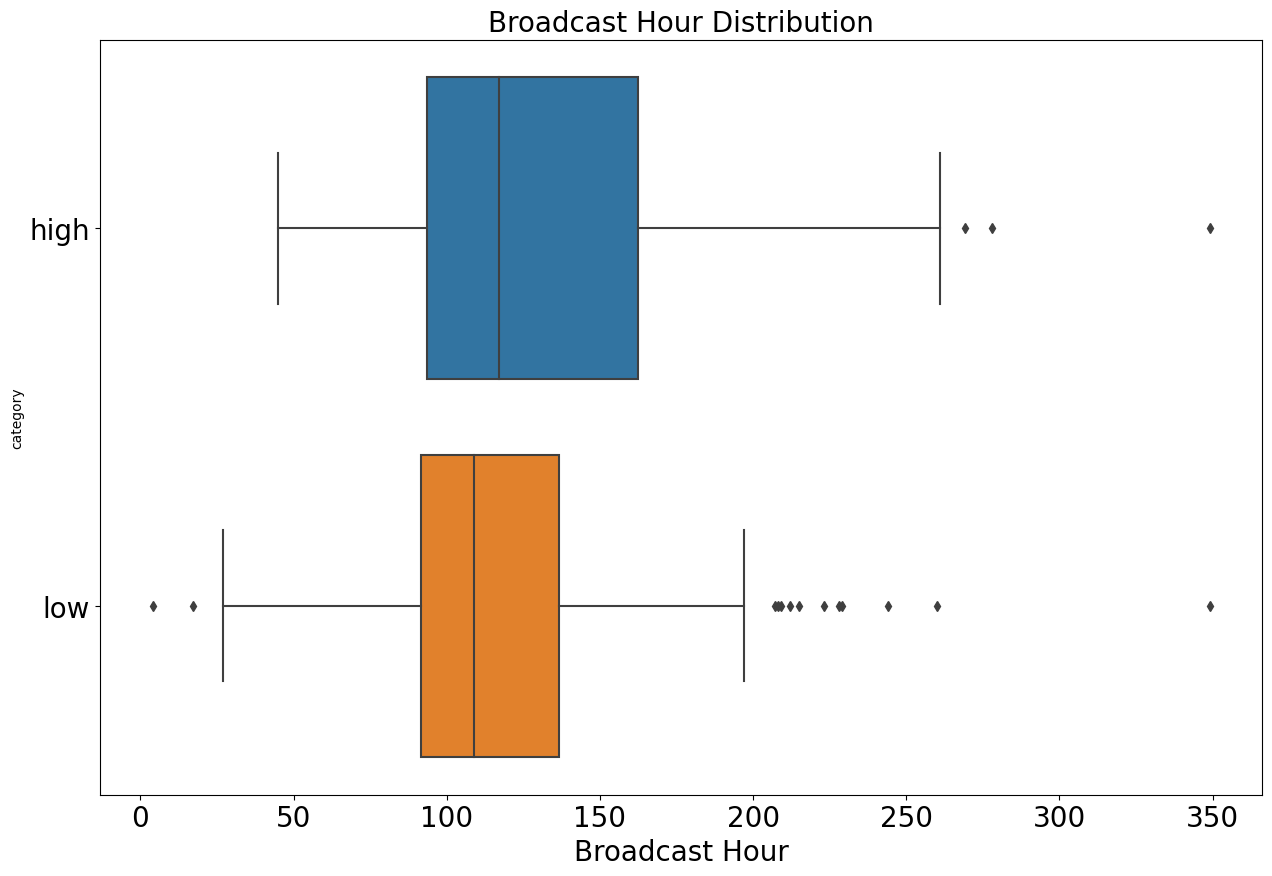

In [ ]:
fig = plt.figure(figsize =(15, 10),dpi=100)
colors = sns.color_palette('pastel')[0]
ax = sns.boxplot(x='Broadcast Hours', y='category', data=df[df['category']!='normal'])
ax.axes.set_title("Broadcast Hour Distribution",fontsize=20)
ax.set_xlabel("Broadcast Hour",fontsize=20)
ax.tick_params(labelsize=20)
plt.show()

From graph and statistics above i see that the high star streamer distribution slightly more skewed than but there isnt big difference in median, q1, q3 position.

I assume there is no big effect of broadcast hours
and to prove my assumption here comes the hypothesis:

H0 : Streamers with broadcast hours >= 114 have median pay rate equal to steamer with total follower <= 114

H1 : Streamers with broadcast hours >= 114 have median pay rate not equal to steamer with total follower <= 114

In [49]:
df['Broadcast Hours'].describe()

count    620.000000
mean     129.016129
std       52.475732
min        1.000000
25%       93.000000
50%      114.000000
75%      153.000000
max      571.000000
Name: Broadcast Hours, dtype: float64

In [48]:
stat_avg = 0
p_avg = 0
alpha = 0.03
m = df['Broadcast Hours'].quantile(0.5)
for i in range(1,10001):
  df_yes = dfm['PaidStarPerWatchedHour'][dfm['Broadcast Hours'] >= m]
  df_no = dfm['PaidStarPerWatchedHour'][dfm['Broadcast Hours'] < m]
  if df_yes.shape[0] < df_no.shape[0]:
    df_no = dfm['PaidStarPerWatchedHour'][dfm['Broadcast Hours'] < m].sample(n=df_yes.shape[0])
  else:
    df_yes = dfm['PaidStarPerWatchedHour'][dfm['Broadcast Hours'] >= m].sample(n=df_no.shape[0])
  stat, p = stats.mannwhitneyu(df_yes, df_no)
  stat_avg = (stat_avg+stat)/2
  p_avg = (p_avg+p)/2
print(' ')
print('MWU test result p-val = %.8f' % (p_avg))
print(' ')
if p_avg > alpha:
  print('Fail to reject H0')
else:
  print('Reject H0')

 
MWU test result p-val = 0.05121034
 
Fail to reject H0


## Game Played Comparison

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


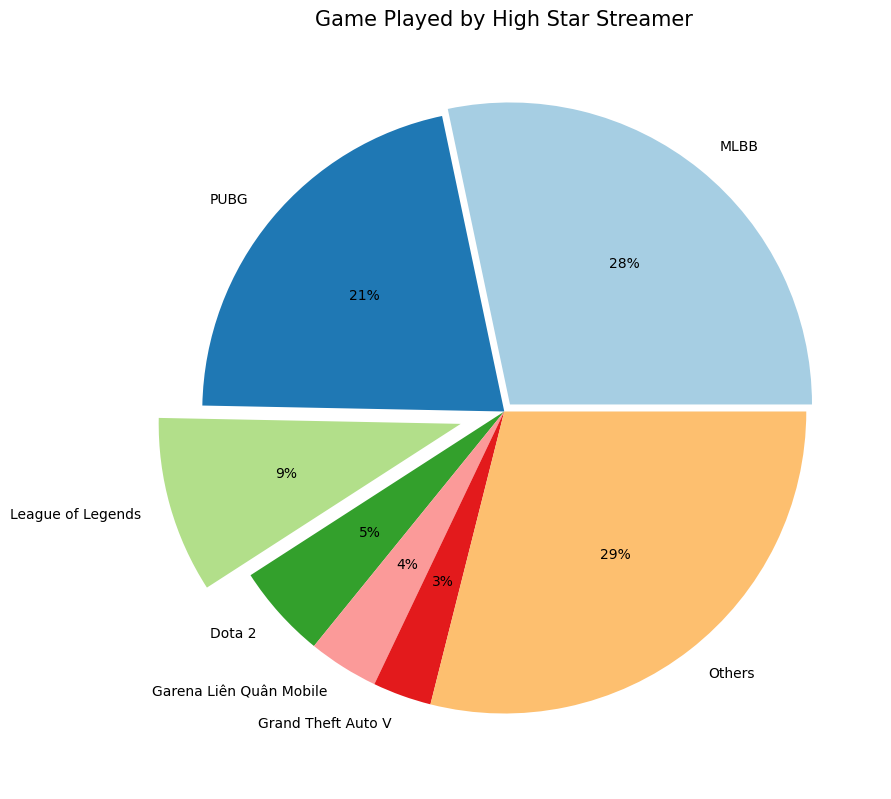

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


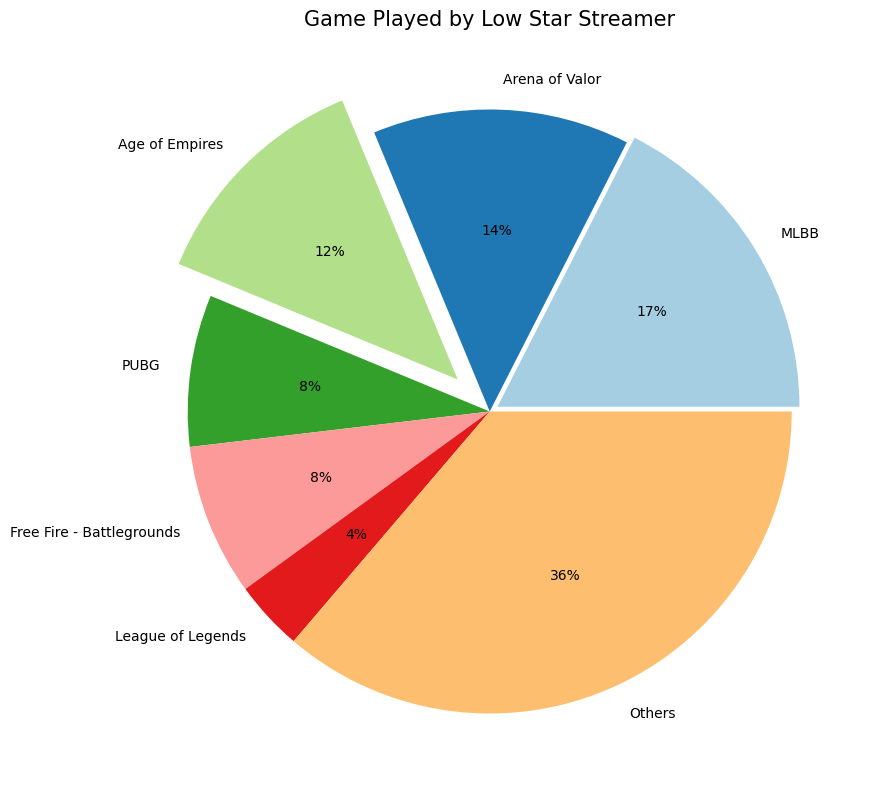

In [ ]:
data = df1_high.groupby(['Game']).agg({'Country':'count'}).reset_index()
fig = plt.figure(figsize =(10, 10),dpi=100)
data = data.sort_values(by='Country',ascending=False).reset_index()
for i in range(data.shape[0]):
  if i >=6:
    data['Game'][i] = 'Others'
    data['Country'][6] = data['Country'][6]+data['Country'][i]
data = data.drop(data.index[range(7,data.shape[0])])
colors = sns.color_palette('Paired')[0:15]
#create pie chart
plt.pie(data['Country'], labels = data['Game'] , colors = colors, autopct='%.0f%%', explode=[0.03,0,0.15,0,0,0,0])
plt.title("Game Played by High Star Streamer",fontsize=15)
plt.show()

data = df1_low.groupby(['Game']).agg({'Country':'count'}).reset_index()
fig = plt.figure(figsize =(10, 10),dpi=100)
data = data.sort_values(by='Country',ascending=False).reset_index()
for i in range(data.shape[0]):
  if i >=6:
    data['Game'][i] = 'Others'
    data['Country'][6] = data['Country'][6]+data['Country'][i]
data = data.drop(data.index[range(7,data.shape[0])])
colors = sns.color_palette('Paired')[0:15]
#create pie chart
plt.pie(data['Country'], labels = data['Game'] , colors = colors, autopct='%.0f%%', explode=[0.03,0,0.15,0,0,0,0])
plt.title("Game Played by Low Star Streamer",fontsize=15)
plt.show()

From graph above MLBB and PUBG have a high rank in both category. I see there is Age of Empire that suspicious because in low star game it rank 3 with 12% but in high star game it dont even reach 3%

### Game Age of Empires x MLBB H0 Testing

I try hypothesis testing with,

H0 : Streamer that play Age of Empires have median pay rate equal to streamer that play MLBB

H1 : Streamer that play Age of Empires have median pay rate not equal to streamer that play MLBB

In [50]:
stat_avg = 0
p_avg = 0
alpha = 0.03
for i in range(1,10001):
  df_yes = df['PaidStarPerWatchedHour'][df['Game'] == 'Age of Empires']
  df_no = df['PaidStarPerWatchedHour'][df['Game'] == 'MLBB']
  if df_yes.shape[0] < df_no.shape[0]:
    df_no = df['PaidStarPerWatchedHour'][df['Game'] == 'MLBB'].sample(n=df_yes.shape[0])
  else:
    df_yes = df['PaidStarPerWatchedHour'][df['Game'] == 'Age of Empires'].sample(n=df_no.shape[0])
  stat, p = stats.mannwhitneyu(df_yes, df_no)
  stat_avg = (stat_avg+stat)/2
  p_avg = (p_avg+p)/2
print(' ')
print('MWU test result p-val = %.8f' % (p_avg))
print(' ')
if p_avg > alpha:
  print('Fail to reject H0')
else:
  print('Reject H0')

 
MWU test result p-val = 0.00009947
 
Reject H0


## Role Comparison

In [52]:
columns_float = list(df.select_dtypes(['float64']).columns)
role = pd.DataFrame(columns=['Role','High Star','Low Star'])
for i in columns_float:
  if 'Role' in i:
    role = role.append({'Role' : i, 'High Star' : df1_high[i].mean(),'Low Star' : df1_low[i].mean() }, ignore_index = True)
roles = role.copy()
roles['diff'] = abs(roles['High Star']-roles['Low Star'])
roles = roles.sort_values(by='diff',ascending=False).reset_index()
sorter = roles['Role'].to_list()
role = pd.melt(role, id_vars="Role", var_name="Star", value_name="Average")
role_select = role.copy()
role.Role = role.Role.astype('category')
role.Role.cat.set_categories(sorter,inplace=True)

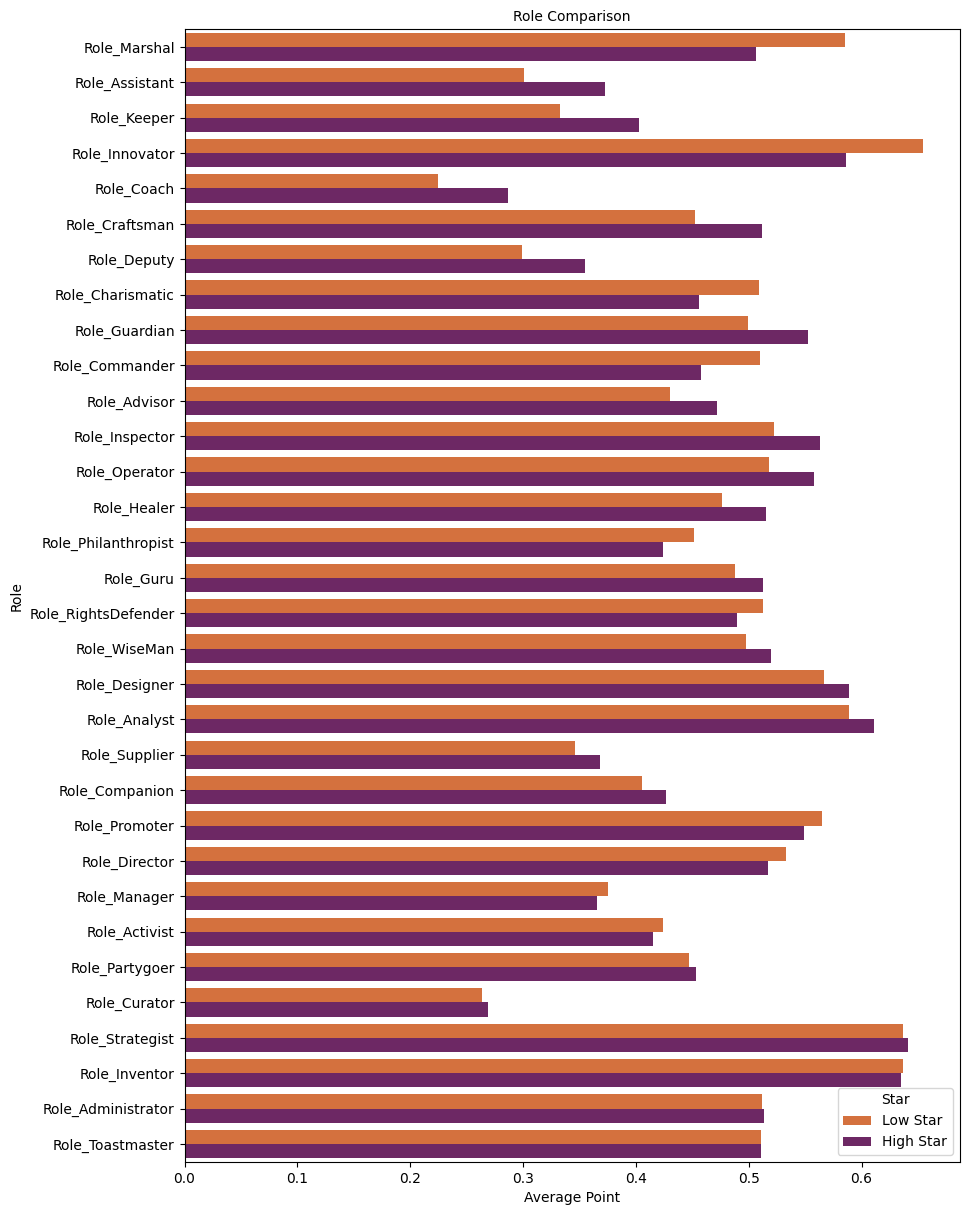

In [53]:
data = role.sort_values(['Role'])
fig = plt.figure(figsize =(10, 15),dpi=100)
ax = sns.barplot(y='Role', x='Average',hue='Star', data=data, palette='inferno_r')
font = 10
ax.axes.set_title("Role Comparison",fontsize=font)
ax.set_xlabel("Average Point",fontsize=font)
ax.set_ylabel("Role",fontsize=font)
ax.tick_params(labelsize=font)
plt.show()

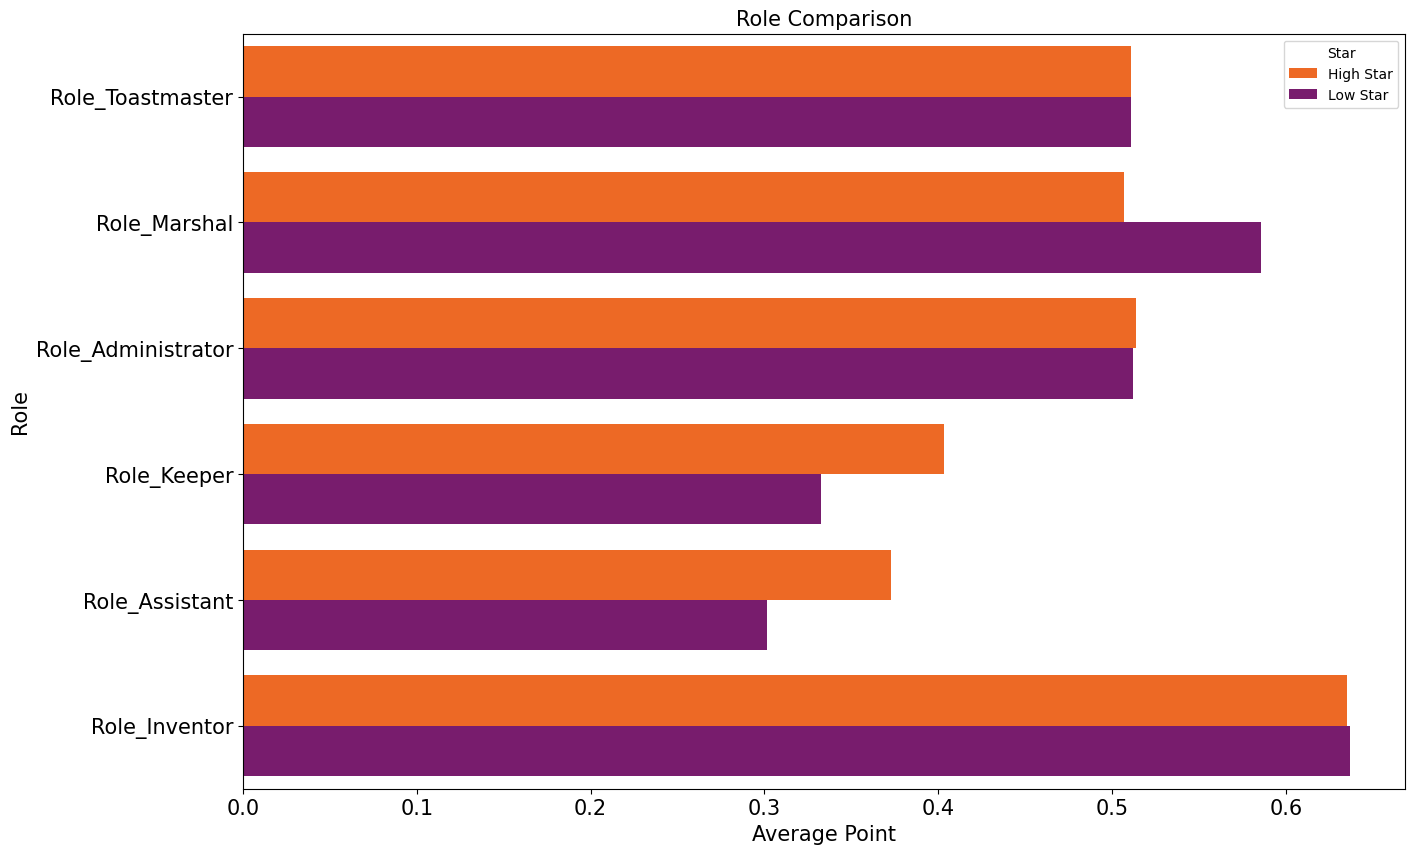

In [67]:
mask = role_select['Role'].isin(list(sorter[i] for i in [0,1,2,-3,-2,-1]))
data = role_select[mask]
fig = plt.figure(figsize =(15, 10),dpi=100)
ax = sns.barplot(y='Role', x='Average',hue='Star', data=data, palette='inferno_r', saturation=100)
font = 15
ax.axes.set_title("Role Comparison",fontsize=font)
ax.set_xlabel("Average Point",fontsize=font)
ax.set_ylabel("Role",fontsize=font)
ax.tick_params(labelsize=font)
plt.show()

The graph above is about average point of role feature based on high and low star. From there i can see some role have different average point between star rate and that means there something happen there.

So i will do a hypothesis testing to all this feature with,

H0 : Streamer with Role >= (Role mean) have median pay rate equal to streamer with Role < (Role median)

H1 : Streamer with Role >= (Role mean) have median pay rate not equal to streamer with Role < (Role median)

### Role H0 Testing

In [70]:
alpha = 0.03
list_role_reject = []
list_role_fail_reject = []
for i in columns_float:
  if 'Role' in i:
    m = df[i].mean()
    stat_avg = 0
    p_avg = 0
    for j in range(1,10001):
      df_yes = dfm['PaidStarPerWatchedHour'][dfm[i] >= m]
      df_no = dfm['PaidStarPerWatchedHour'][dfm[i] < m]
      if df_yes.shape[0] < df_no.shape[0]:
        df_no = dfm['PaidStarPerWatchedHour'][dfm[i] < m].sample(n=df_yes.shape[0])
      else:
        df_yes = dfm['PaidStarPerWatchedHour'][dfm[i] >= m].sample(n=df_no.shape[0])
      stat, p = stats.mannwhitneyu(df_yes, df_no)
      stat_avg = (stat_avg+stat)/2
      p_avg = (p_avg+p)/2
    if p_avg > alpha:
      list_role_fail_reject.append(i)
    else:
      list_role_reject.append(i)
print(list_role_fail_reject)
print(' ')
print(list_role_reject)

['Role_Director', 'Role_Toastmaster', 'Role_Administrator', 'Role_Partygoer', 'Role_Guru', 'Role_Manager', 'Role_WiseMan', 'Role_Healer', 'Role_Operator', 'Role_RightsDefender', 'Role_Philanthropist', 'Role_Promoter', 'Role_Analyst', 'Role_Inventor', 'Role_Designer', 'Role_Strategist', 'Role_Inspector', 'Role_Companion', 'Role_Activist', 'Role_Curator']
 
['Role_Craftsman', 'Role_Marshal', 'Role_Supplier', 'Role_Innovator', 'Role_Guardian', 'Role_Keeper', 'Role_Assistant', 'Role_Coach', 'Role_Advisor', 'Role_Deputy', 'Role_Commander', 'Role_Charismatic']


## Character Comparison

In [71]:
facet = pd.DataFrame(columns=['Char_Facet','High Star','Low Star'])
for i in columns_float:
  if 'Character_Cont' in i:
    facet = facet.append({'Char_Facet' : i, 'High Star' : df1_high[i].mean(), 'Low Star' : df1_low[i].mean()}, ignore_index = True)
facet = pd.melt(facet, id_vars="Char_Facet", var_name="Star", value_name="Average")

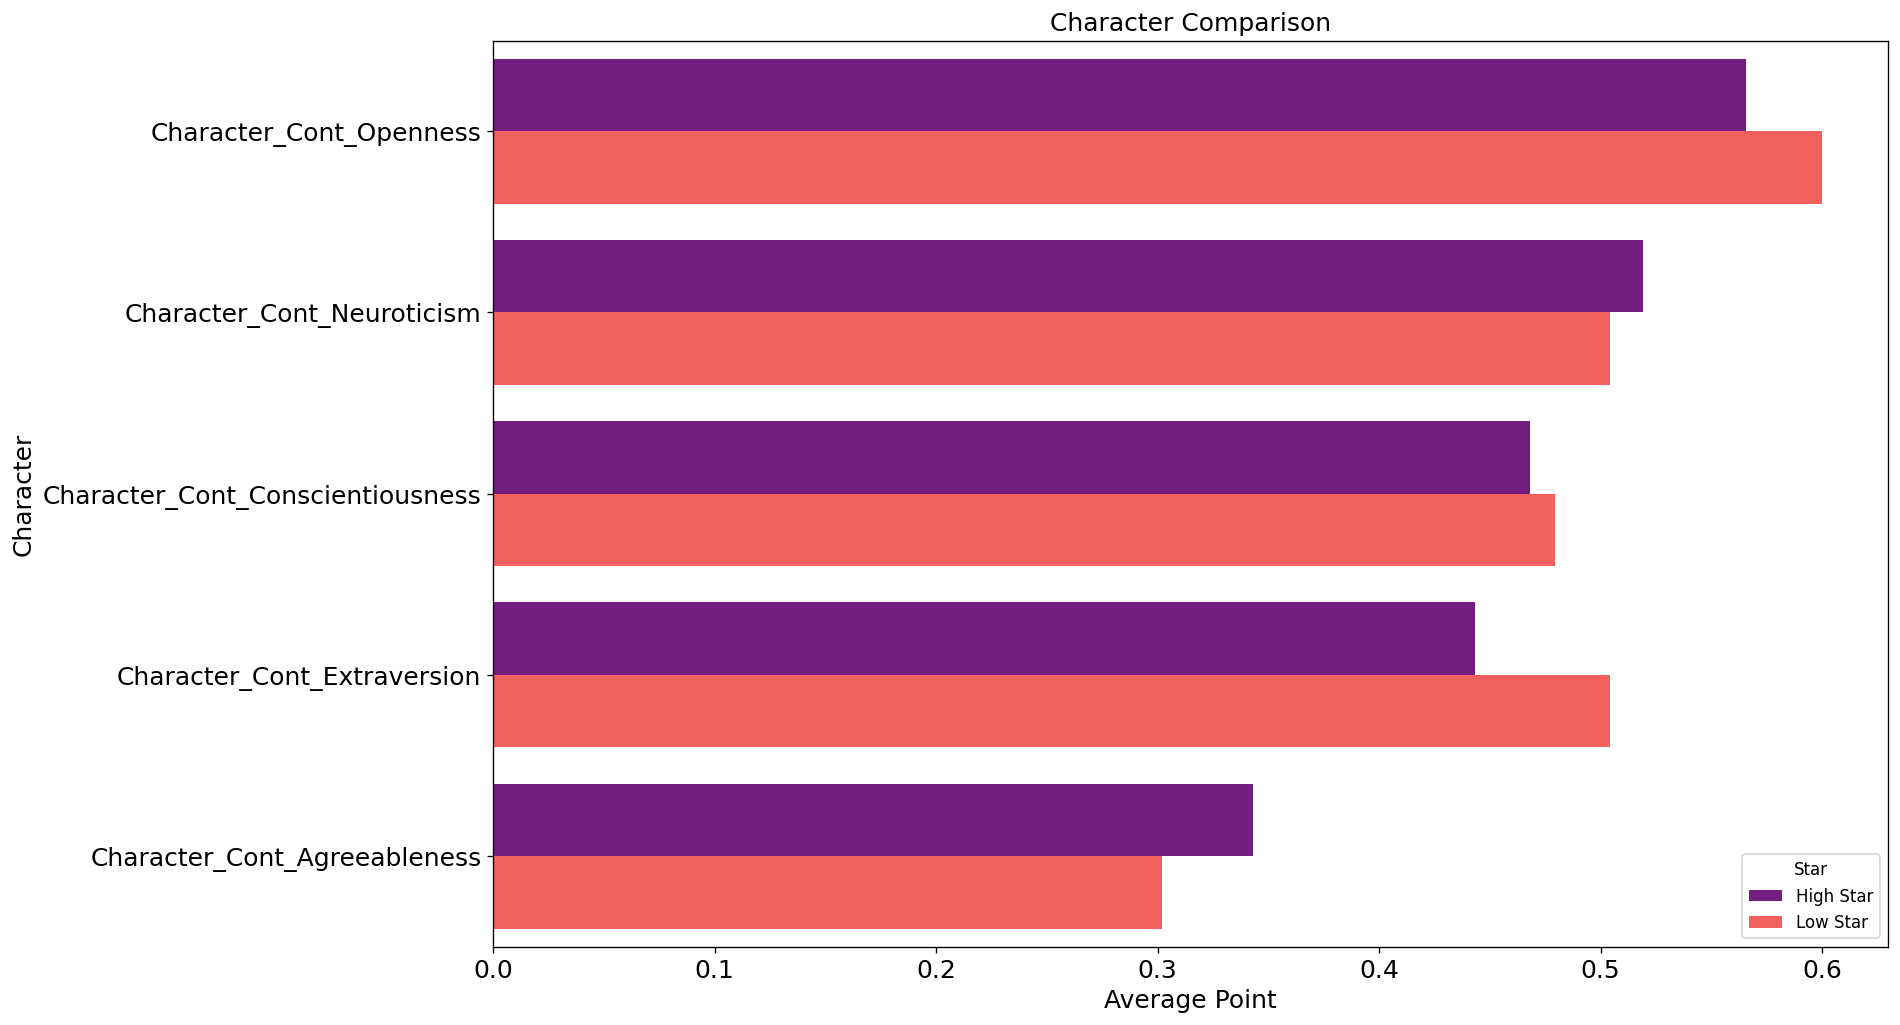

In [72]:
data = facet.sort_values(by=['Star','Average'],ascending=[True, False])
fig = plt.figure(figsize =(15, 10),dpi=120)
ax = sns.barplot(y='Char_Facet', x='Average', hue='Star', data=data, palette='magma',saturation=100)
font = 15
ax.axes.set_title("Character Comparison",fontsize=font)
ax.set_xlabel("Average Point",fontsize=font)
ax.set_ylabel("Character",fontsize=font)
ax.tick_params(labelsize=font)
plt.show()

### Character_Cont H0 Testing

In [74]:
alpha = 0.03
list_character_cont_reject = []
list_character_cont_fail_reject = []
for i in columns_float:
  if 'Character_Cont' in i:
    m = df[i].mean()
    stat_avg = 0
    p_avg = 0
    for j in range(1,10001):
      df_yes = dfm['PaidStarPerWatchedHour'][dfm[i] >= m]
      df_no = dfm['PaidStarPerWatchedHour'][dfm[i] < m]
      if df_yes.shape[0] < df_no.shape[0]:
        df_no = dfm['PaidStarPerWatchedHour'][dfm[i] < m].sample(n=df_yes.shape[0])
      else:
        df_yes = dfm['PaidStarPerWatchedHour'][dfm[i] >= m].sample(n=df_no.shape[0])
      stat, p = stats.mannwhitneyu(df_yes, df_no)
      stat_avg = (stat_avg+stat)/2
      p_avg = (p_avg+p)/2
    if p_avg > alpha:
      list_character_cont_fail_reject.append(i)
    else:
      list_character_cont_reject.append(i)
print(list_character_cont_reject)
print(' ')
print(list_character_cont_fail_reject)

['Character_Cont_Extraversion', 'Character_Cont_Agreeableness']
 
['Character_Cont_Conscientiousness', 'Character_Cont_Openness', 'Character_Cont_Neuroticism']


## Character_Facet

In [ ]:
role = pd.DataFrame(columns=['Character_Facet','High Star','Low Star'])
for i in columns_float:
  if 'Character_Facet' in i:
    role = role.append({'Character_Facet' : i, 'High Star' : df1_high[i].mean(),'Low Star' : df1_low[i].mean() }, ignore_index = True)
roles = role.copy()
roles['diff'] = abs(roles['High Star']-roles['Low Star'])
roles = roles.sort_values(by='diff',ascending=False).reset_index()
sorter = roles['Character_Facet'].to_list()
role = pd.melt(role, id_vars="Character_Facet", var_name="Star", value_name="Average")
role_select = role.copy()
role.Character_Facet = role.Character_Facet.astype('category')
role.Character_Facet.cat.set_categories(sorter,inplace=True)

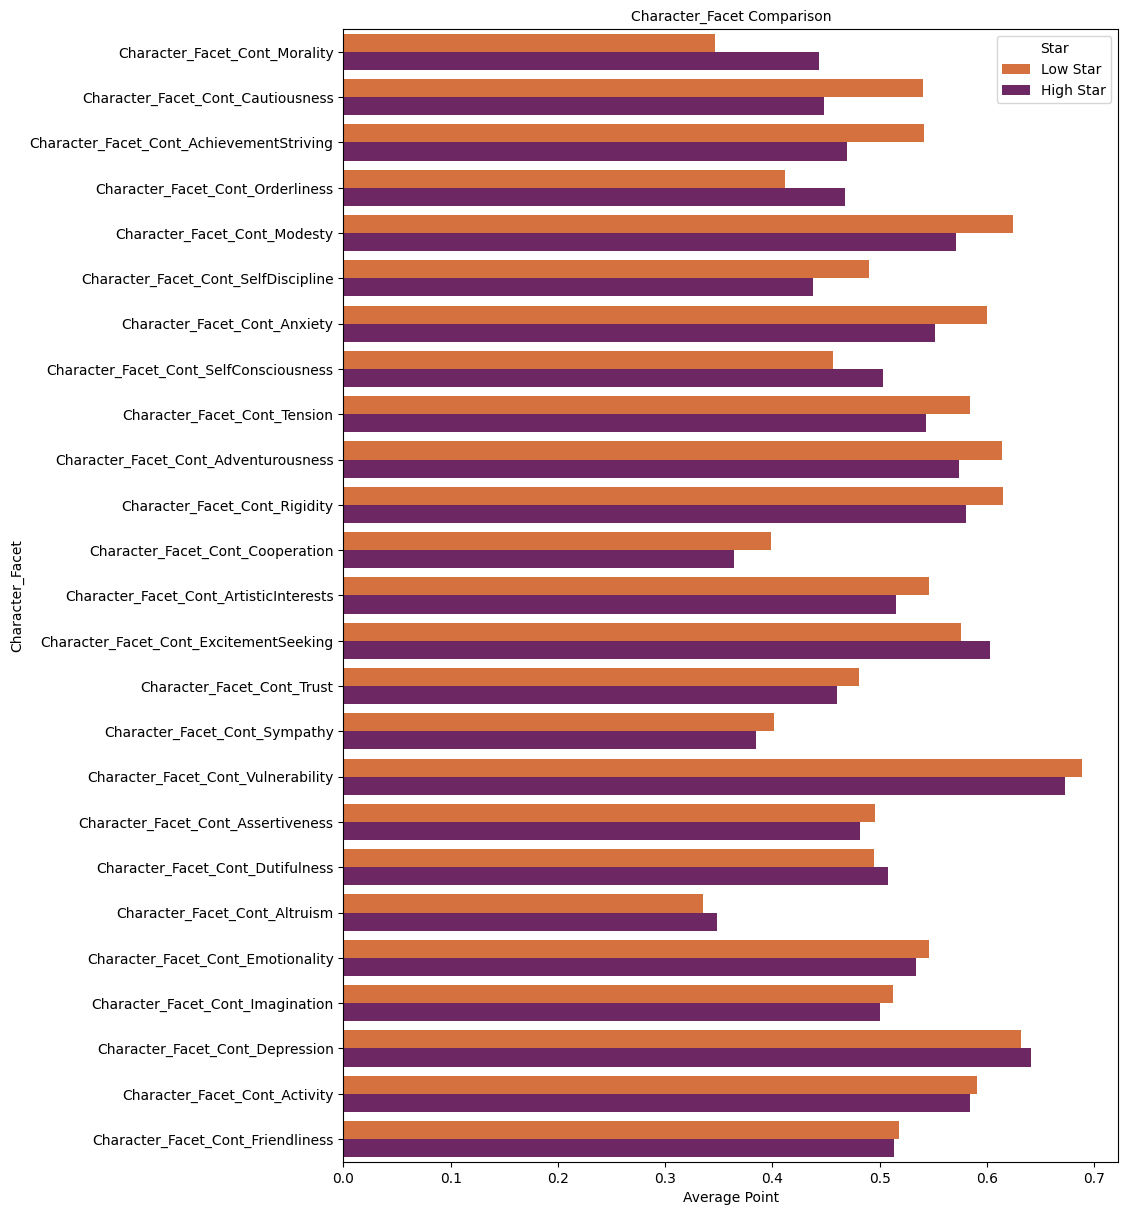

In [ ]:
data = role.sort_values(['Character_Facet'])
fig = plt.figure(figsize =(10, 15),dpi=100)
ax = sns.barplot(y='Character_Facet', x='Average',hue='Star', data=data, palette='inferno_r')
font = 10
ax.axes.set_title("Character_Facet Comparison",fontsize=font)
ax.set_xlabel("Average Point",fontsize=font)
ax.set_ylabel("Character_Facet",fontsize=font)
ax.tick_params(labelsize=font)
plt.show()

In [76]:
alpha = 0.03
list_character_facet_reject = []
list_character_facet_fail_reject = []
for i in columns_float:
  if 'Character_Facet' in i:
    m = df[i].mean()
    stat_avg = 0
    p_avg = 0
    for j in range(1,10001):
      df_yes = dfm['PaidStarPerWatchedHour'][dfm[i] >= m]
      df_no = dfm['PaidStarPerWatchedHour'][dfm[i] < m]
      if df_yes.shape[0] < df_no.shape[0]:
        df_no = dfm['PaidStarPerWatchedHour'][dfm[i] < m].sample(n=df_yes.shape[0])
      else:
        df_yes = dfm['PaidStarPerWatchedHour'][dfm[i] >= m].sample(n=df_no.shape[0])
      stat, p = stats.mannwhitneyu(df_yes, df_no)
      stat_avg = (stat_avg+stat)/2
      p_avg = (p_avg+p)/2
    if p_avg > alpha:
      list_character_facet_fail_reject.append(i)
    else:
      list_character_facet_reject.append(i)
print(list_character_facet_reject)
print(' ')
print(list_character_facet_fail_reject)

['Character_Facet_Cont_Rigidity', 'Character_Facet_Cont_AchievementStriving', 'Character_Facet_Cont_SelfConsciousness', 'Character_Facet_Cont_Anxiety', 'Character_Facet_Cont_Emotionality', 'Character_Facet_Cont_Tension', 'Character_Facet_Cont_Orderliness', 'Character_Facet_Cont_Trust', 'Character_Facet_Cont_ExcitementSeeking', 'Character_Facet_Cont_Morality', 'Character_Facet_Cont_SelfDiscipline', 'Character_Facet_Cont_Cooperation', 'Character_Facet_Cont_Cautiousness']
 
['Character_Facet_Cont_Dutifulness', 'Character_Facet_Cont_Sympathy', 'Character_Facet_Cont_ArtisticInterests', 'Character_Facet_Cont_Friendliness', 'Character_Facet_Cont_Adventurousness', 'Character_Facet_Cont_Activity', 'Character_Facet_Cont_Altruism', 'Character_Facet_Cont_Modesty', 'Character_Facet_Cont_Imagination', 'Character_Facet_Cont_Vulnerability', 'Character_Facet_Cont_Depression', 'Character_Facet_Cont_Assertiveness']


## Temperament Comparison

In [77]:
temper = pd.DataFrame(columns=['Temper','High Star','Low Star'])
for i in columns_float:
  if 'Temper' in i:
    temper = temper.append({'Temper' : i, 'High Star' : df1_high[i].mean(), 'Low Star' : df1_low[i].mean()}, ignore_index = True)
temper = pd.melt(temper, id_vars="Temper", var_name="Star", value_name="Average")

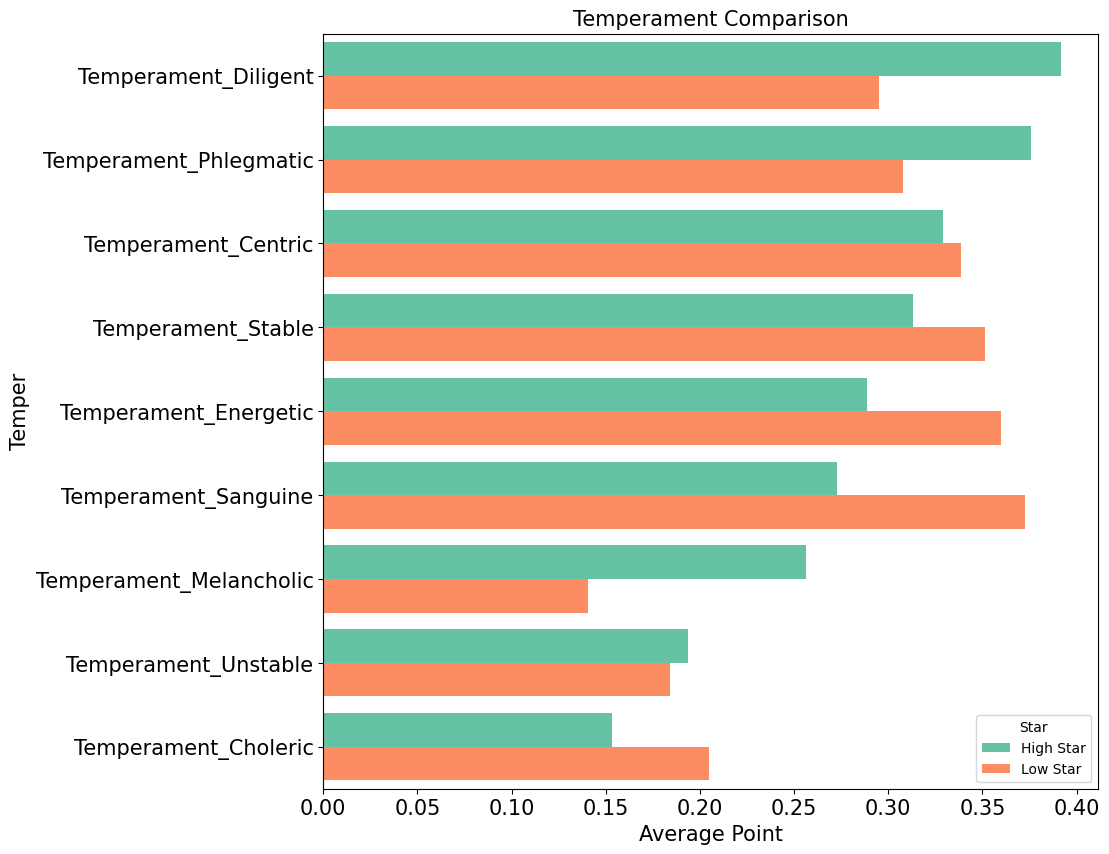

In [78]:
data = temper.sort_values(by=['Star','Average'],ascending=[True, False])
fig = plt.figure(figsize =(10, 10),dpi=100)
ax = sns.barplot(y='Temper', hue='Star', x='Average', data=data, palette='Set2',saturation=100)
font = 15
ax.axes.set_title("Temperament Comparison",fontsize=font)
ax.set_xlabel("Average Point",fontsize=font)
ax.set_ylabel("Temper",fontsize=font)
ax.tick_params(labelsize=font)
plt.show()
plt.clf()
plt.close()

### Temperament Diligent H0 Testing

In [79]:
alpha = 0.03
list_temperament_reject = []
list_temperament_fail_reject = []
for i in columns_float:
  if 'Temper' in i:
    m = df[i].mean()
    stat_avg = 0
    p_avg = 0
    for j in range(1,10001):
      df_yes = dfm['PaidStarPerWatchedHour'][dfm[i] >= m]
      df_no = dfm['PaidStarPerWatchedHour'][dfm[i] < m]
      if df_yes.shape[0] < df_no.shape[0]:
        df_no = dfm['PaidStarPerWatchedHour'][dfm[i] < m].sample(n=df_yes.shape[0])
      else:
        df_yes = dfm['PaidStarPerWatchedHour'][dfm[i] >= m].sample(n=df_no.shape[0])
      stat, p = stats.mannwhitneyu(df_yes, df_no)
      stat_avg = (stat_avg+stat)/2
      p_avg = (p_avg+p)/2
    if p_avg > alpha:
      list_temperament_fail_reject.append(i)
    else:
      list_temperament_reject.append(i)
print(list_temperament_reject)
print(' ')
print(list_temperament_fail_reject)

['Temperament_Energetic', 'Temperament_Melancholic', 'Temperament_Phlegmatic']
 
['Temperament_Choleric', 'Temperament_Sanguine', 'Temperament_Diligent', 'Temperament_Stable', 'Temperament_Unstable', 'Temperament_Centric']


## SelfEsteem Comparison

In [80]:
self = pd.DataFrame(columns=['SelfEsteem','High Star','Low Star'])
for i in columns_float:
  if 'Self' in i:
    self = self.append({'SelfEsteem' : i, 'High Star' : df1_high[i].quantile(0.5), 'Low Star' : df1_low[i].quantile(0.5)}, ignore_index = True)
self = pd.melt(self, id_vars='SelfEsteem', var_name="Star", value_name="Average")

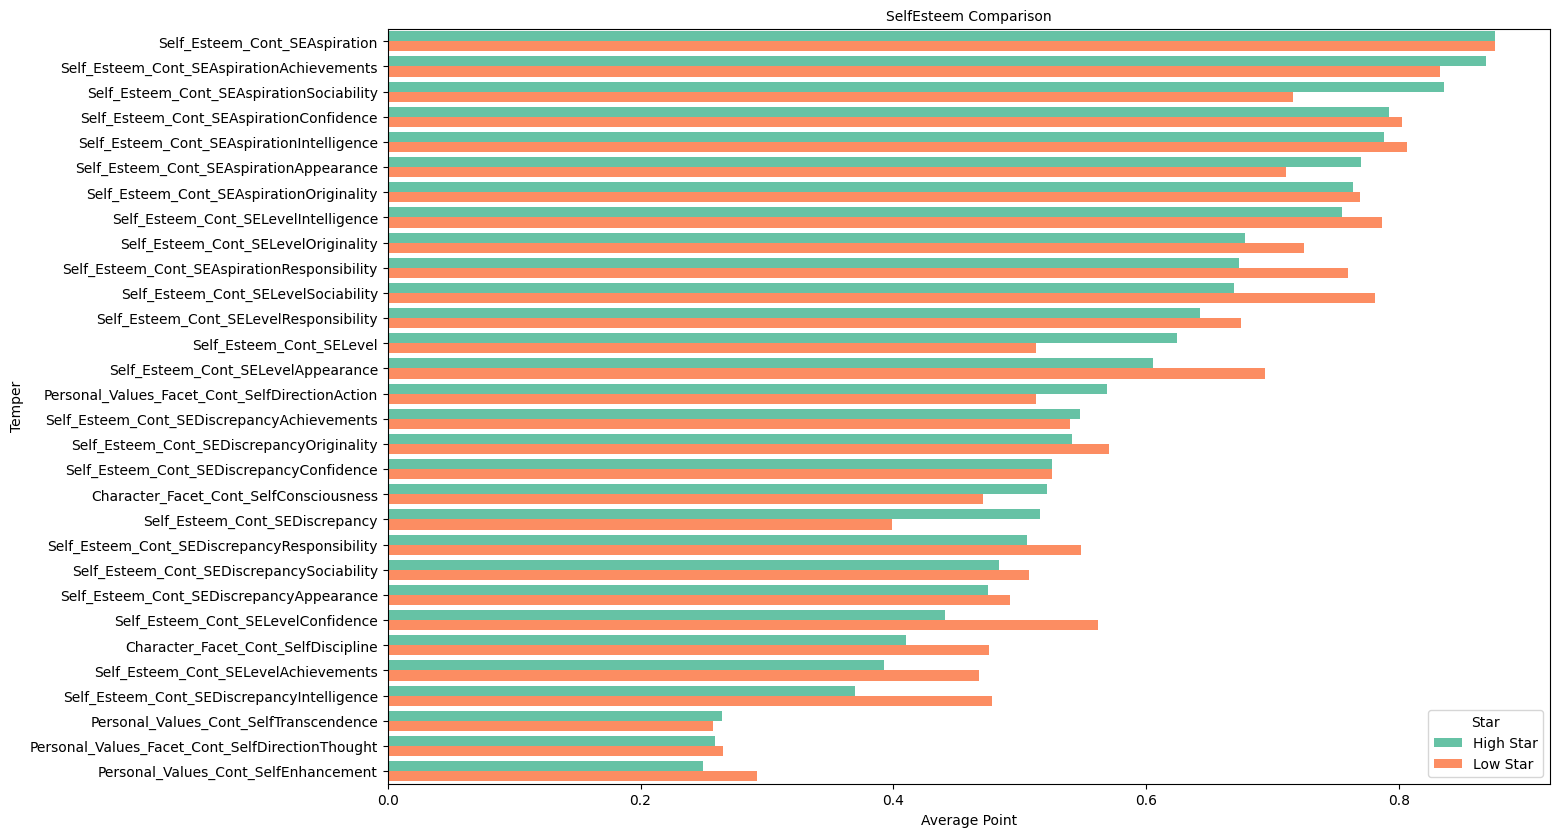

In [81]:
data = self.sort_values(by=['Star','Average'],ascending=[True, False])
fig = plt.figure(figsize =(15, 10),dpi=100)
ax = sns.barplot(y='SelfEsteem', x='Average', hue='Star', data=data, palette='Set2',saturation=100)
font = 10
ax.axes.set_title("SelfEsteem Comparison",fontsize=font)
ax.set_xlabel("Average Point",fontsize=font)
ax.set_ylabel("Temper",fontsize=font)
ax.tick_params(labelsize=font)
plt.show()

In [82]:
alpha = 0.03
list_self_reject = []
list_self_fail_reject = []
for i in columns_float:
  if 'Self' in i:
    m = df[i].mean()
    stat_avg = 0
    p_avg = 0
    for j in range(1,10001):
      df_yes = dfm['PaidStarPerWatchedHour'][dfm[i] >= m]
      df_no = dfm['PaidStarPerWatchedHour'][dfm[i] < m]
      if df_yes.shape[0] < df_no.shape[0]:
        df_no = dfm['PaidStarPerWatchedHour'][dfm[i] < m].sample(n=df_yes.shape[0])
      else:
        df_yes = dfm['PaidStarPerWatchedHour'][dfm[i] >= m].sample(n=df_no.shape[0])
      stat, p = stats.mannwhitneyu(df_yes, df_no)
      stat_avg = (stat_avg+stat)/2
      p_avg = (p_avg+p)/2
    if p_avg > alpha:
      list_self_fail_reject.append(i)
    else:
      list_self_reject.append(i)
print(list_self_reject)
print(' ')
print(list_self_fail_reject)

['Self_Esteem_Cont_SEDiscrepancyResponsibility', 'Self_Esteem_Cont_SELevel', 'Character_Facet_Cont_SelfConsciousness', 'Self_Esteem_Cont_SELevelResponsibility', 'Self_Esteem_Cont_SEAspirationResponsibility', 'Self_Esteem_Cont_SELevelAchievements', 'Personal_Values_Cont_SelfEnhancement', 'Self_Esteem_Cont_SEAspirationSociability', 'Self_Esteem_Cont_SEAspirationAchievements', 'Self_Esteem_Cont_SELevelConfidence', 'Self_Esteem_Cont_SEDiscrepancy', 'Self_Esteem_Cont_SEAspirationIntelligence', 'Self_Esteem_Cont_SELevelSociability', 'Personal_Values_Facet_Cont_SelfDirectionAction', 'Self_Esteem_Cont_SELevelOriginality', 'Personal_Values_Cont_SelfTranscendence', 'Self_Esteem_Cont_SEAspirationAppearance', 'Character_Facet_Cont_SelfDiscipline', 'Self_Esteem_Cont_SEDiscrepancyIntelligence', 'Self_Esteem_Cont_SELevelAppearance', 'Self_Esteem_Cont_SELevelIntelligence']
 
['Self_Esteem_Cont_SEDiscrepancySociability', 'Self_Esteem_Cont_SEAspiration', 'Self_Esteem_Cont_SEDiscrepancyAchievements', 'Pe

## MBTI Comparison

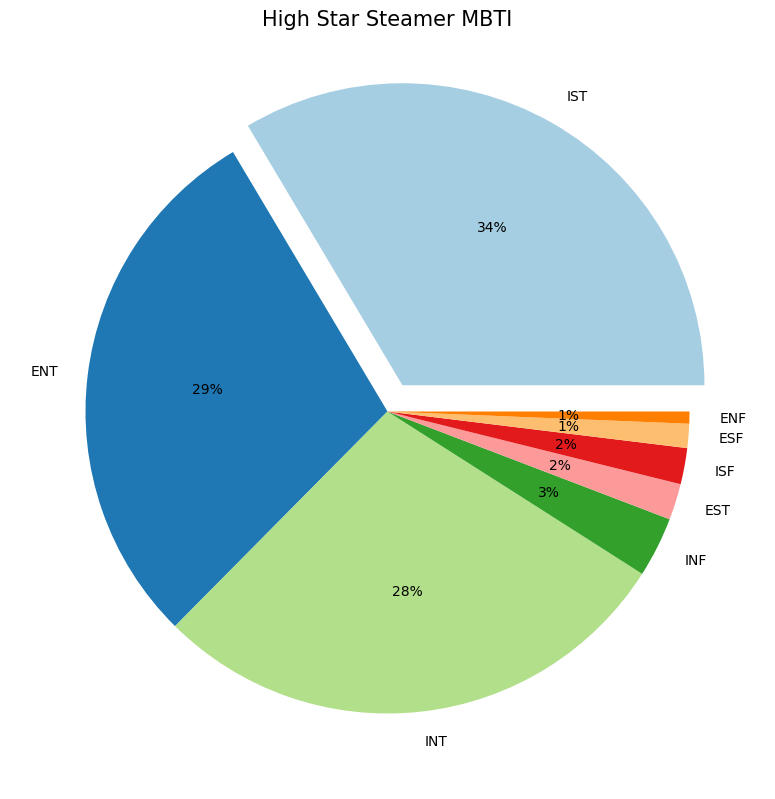

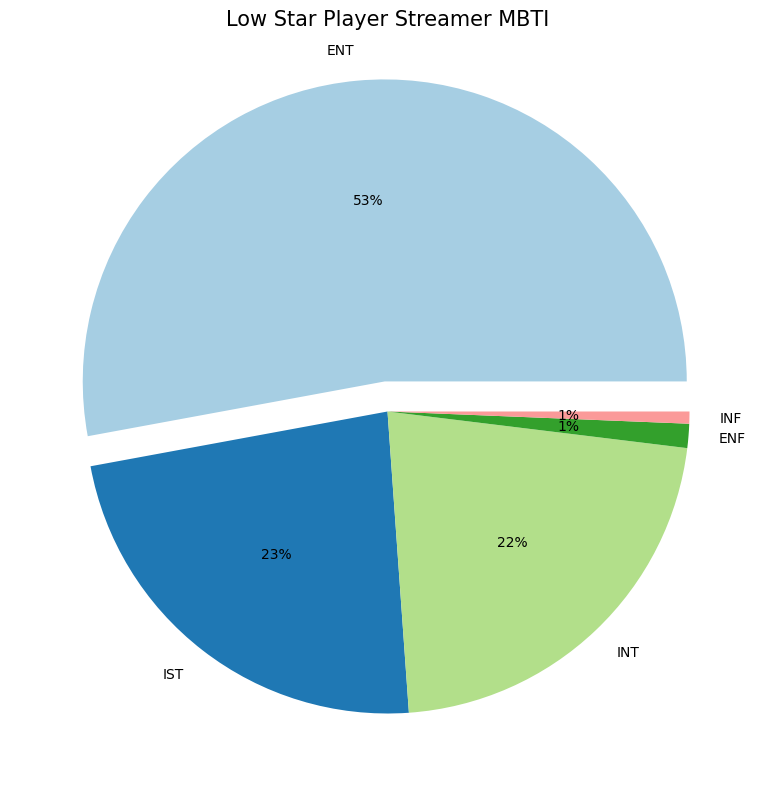

In [ ]:
data = df1_high.groupby(['MBTI_grouped']).agg({'Gender':'count'}).reset_index()
fig = plt.figure(figsize =(10, 10),dpi=100)
data = data.sort_values(by='Gender',ascending=False).reset_index()
colors = sns.color_palette('Paired')[0:15]
#create pie chart
plt.pie(data['Gender'], labels = data['MBTI_grouped'] , colors = colors, autopct='%.0f%%', explode=[0.1,0,0,0,0,0,0,0])
plt.title("High Star Steamer MBTI",fontsize=15)
plt.show()

data = df1_low.groupby(['MBTI_grouped']).agg({'Gender':'count'}).reset_index()
fig = plt.figure(figsize =(10, 10),dpi=100)
data = data.sort_values(by='Gender',ascending=False).reset_index()
colors = sns.color_palette('Paired')[0:15]
#create pie chart
plt.pie(data['Gender'], labels = data['MBTI_grouped'] , colors = colors, autopct='%.0f%%', explode=[0.1,0,0,0,0])
plt.title("Low Star Player Streamer MBTI",fontsize=15)
plt.show()

### MBTI ENT x IST H0 Testing

In [96]:
stat_avg = 0
p_avg = 0
alpha = 0.03
for i in range(1,10001):
  df_yes = dfm['PaidStarPerWatchedHour'][dfm['MBTI_grouped'] == 'ENT']
  df_no = dfm['PaidStarPerWatchedHour'][dfm['MBTI_grouped'] == 'IST']
  if df_yes.shape[0] < df_no.shape[0]:
    df_no = dfm['PaidStarPerWatchedHour'][dfm['MBTI_grouped'] == 'IST'].sample(n=df_yes.shape[0])
  else:
    df_yes = dfm['PaidStarPerWatchedHour'][dfm['MBTI_grouped'] == 'ENT'].sample(n=df_no.shape[0])
  stat, p = stats.mannwhitneyu(df_yes, df_no)
  stat_avg = (stat_avg+stat)/2
  p_avg = (p_avg+p)/2
print(' ')
print('MWU test result p-val = %.8f' % (p_avg))
print(' ')
if p_avg > alpha:
  print('Fail to reject H0')
else:
  print('Reject H0')

 
MWU test result p-val = 0.00834755
 
Reject H0


# Summary

So this is my result about certain features of streamers will make them more or less likely to receive stars from their audience

In [127]:
list_feature = list_character_cont_reject + list_character_facet_reject + list_self_reject + list_temperament_reject + list_role_reject + ['Country','Game','MBTI_grouped']

In [129]:
list_feature

['Character_Cont_Extraversion',
 'Character_Cont_Agreeableness',
 'Character_Facet_Cont_Rigidity',
 'Character_Facet_Cont_AchievementStriving',
 'Character_Facet_Cont_SelfConsciousness',
 'Character_Facet_Cont_Anxiety',
 'Character_Facet_Cont_Emotionality',
 'Character_Facet_Cont_Tension',
 'Character_Facet_Cont_Orderliness',
 'Character_Facet_Cont_Trust',
 'Character_Facet_Cont_ExcitementSeeking',
 'Character_Facet_Cont_Morality',
 'Character_Facet_Cont_SelfDiscipline',
 'Character_Facet_Cont_Cooperation',
 'Character_Facet_Cont_Cautiousness',
 'Self_Esteem_Cont_SEDiscrepancyResponsibility',
 'Self_Esteem_Cont_SELevel',
 'Character_Facet_Cont_SelfConsciousness',
 'Self_Esteem_Cont_SELevelResponsibility',
 'Self_Esteem_Cont_SEAspirationResponsibility',
 'Self_Esteem_Cont_SELevelAchievements',
 'Personal_Values_Cont_SelfEnhancement',
 'Self_Esteem_Cont_SEAspirationSociability',
 'Self_Esteem_Cont_SEAspirationAchievements',
 'Self_Esteem_Cont_SELevelConfidence',
 'Self_Esteem_Cont_SEDisc